## L-BFGS statistics tables and plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stats = pd.read_csv('statistics.csv', names = ['lambda', 'm', 'k', 'rel_error',
                                               'gradient_norm', 'func_vals_bp', 'small_eig_bp',
                                               'sol_norm_bp', 'bound_const_part',
                                               'r_iter', 'cond_num_Xhat'])

times = pd.read_csv('times.csv', names = ['lambda', 'm', 'exec_time'])

In [3]:
#stats['log_rel_err'] = np.log10(stats['rel_error'])

In [4]:
#stats = stats.drop(['rel_error', 'gradient_norm'], axis=1)
stats

,lambda,m,k,rel_error,gradient_norm,func_vals_bp,small_eig_bp,sol_norm_bp,bound_const_part,r_iter,cond_num_Xhat
0,1.000000e-10,3,0,1.000000e+00,1.985534e+03,3.701477,7.071068e+09,7.879183e+00,2.062250e+11,-1.000000e+00,1.137546e+13
1,1.000000e-10,3,1,9.996820e-01,3.134922e+02,3.701477,7.071068e+09,7.879183e+00,2.062250e+11,2.349857e-23,1.137546e+13
2,1.000000e-10,3,2,9.913838e-01,1.014118e+02,3.701477,7.071068e+09,7.879183e+00,2.062250e+11,4.807293e-12,1.137546e+13
3,1.000000e-10,3,3,4.699165e-01,8.457198e+01,3.701477,7.071068e+09,7.879183e+00,2.062250e+11,1.731622e-08,1.137546e+13
4,1.000000e-10,3,4,3.462488e-01,2.870631e+01,3.701477,7.071068e+09,7.879183e+00,2.062250e+11,1.295757e-06,1.137546e+13
...,...,...,...,...,...,...,...,...,...,...,...
3103,1.000000e+05,9,3,9.005366e-14,9.538623e-13,0.014039,7.071068e-06,1.007413e+07,1.000063e+00,2.009013e-09,1.000065e+00
3104,1.000000e+05,10,0,1.000000e+00,1.985534e+03,0.014039,7.071068e-06,1.007413e+07,1.000063e+00,-1.000000e+00,1.000065e+00
3105,1.000000e+05,10,1,1.991646e-05,3.954011e-02,0.014039,7.071068e-06,1.007413e+07,1.000063e+00,3.966152e-10,1.000065e+00
3106,1.000000e+05,10,2,2.875190e-11,5.707982e-08,0.014039,7.071068e-06,1.007413e+07,1.000063e+00,2.875009e-11,1.000065e+00


In [5]:
idx = stats.groupby(['lambda', 'm'])['r_iter'].idxmax()
r_col = (stats.loc[idx])['r_iter']

In [6]:
idx = stats.groupby(['lambda', 'm'])['k'].idxmax()
overall_stats = stats.loc[idx]

overall_stats.index = range(0, len(overall_stats))
overall_stats['exec_time'] = times['exec_time']

r_col.index = range(0, len(overall_stats))
overall_stats['r_esteem'] = r_col

overall_stats = overall_stats.drop(['r_iter'], axis=1)


overall_stats

,lambda,m,k,rel_error,gradient_norm,func_vals_bp,small_eig_bp,sol_norm_bp,bound_const_part,cond_num_Xhat,exec_time,r_esteem
0,1.000000e-10,3,35,8.565657e-13,8.425242e-11,3.701477,7.071068e+09,7.879183e+00,2.062250e+11,1.137546e+13,0.207453,4.612216e-02
1,1.000000e-10,4,63,5.466567e-13,5.138490e-11,3.701477,7.071068e+09,7.879183e+00,2.062250e+11,1.137546e+13,0.393542,1.784579e-01
2,1.000000e-10,5,52,7.404359e-13,8.908892e-11,3.701477,7.071068e+09,7.879183e+00,2.062250e+11,1.137546e+13,0.451130,1.253935e-01
3,1.000000e-10,6,37,1.126405e-12,8.681297e-11,3.701477,7.071068e+09,7.879183e+00,2.062250e+11,1.137546e+13,0.193388,5.527893e-02
4,1.000000e-10,7,17,4.436610e-13,2.293928e-11,3.701477,7.071068e+09,7.879183e+00,2.062250e+11,1.137546e+13,0.173919,1.642907e-03
...,...,...,...,...,...,...,...,...,...,...,...,...
123,1.000000e+05,6,3,9.005366e-14,9.538623e-13,0.014039,7.071068e-06,1.007413e+07,1.000063e+00,1.000065e+00,0.060969,2.009013e-09
124,1.000000e+05,7,3,9.005366e-14,9.538623e-13,0.014039,7.071068e-06,1.007413e+07,1.000063e+00,1.000065e+00,0.067274,2.009013e-09
125,1.000000e+05,8,3,9.005366e-14,9.538623e-13,0.014039,7.071068e-06,1.007413e+07,1.000063e+00,1.000065e+00,0.067280,2.009013e-09
126,1.000000e+05,9,3,9.005366e-14,9.538623e-13,0.014039,7.071068e-06,1.007413e+07,1.000063e+00,1.000065e+00,0.069424,2.009013e-09


In [7]:
lambda_values = [1e-10, 1e-5, 0.01, 1, 100, 100000]
m_values = [3, 5, 7, 10]

summary_stats = overall_stats[(overall_stats['m'].isin(m_values)) &
                               (overall_stats['lambda'].isin(lambda_values))]
summary_stats

,lambda,m,k,rel_error,gradient_norm,func_vals_bp,small_eig_bp,sol_norm_bp,bound_const_part,cond_num_Xhat,exec_time,r_esteem
0,1.000000e-10,3,35,8.565657e-13,8.425242e-11,3.701477,7.071068e+09,7.879183e+00,2.062250e+11,1.137546e+13,0.207453,4.612216e-02
2,1.000000e-10,5,52,7.404359e-13,8.908892e-11,3.701477,7.071068e+09,7.879183e+00,2.062250e+11,1.137546e+13,0.451130,1.253935e-01
4,1.000000e-10,7,17,4.436610e-13,2.293928e-11,3.701477,7.071068e+09,7.879183e+00,2.062250e+11,1.137546e+13,0.173919,1.642907e-03
7,1.000000e-10,10,11,3.472700e-13,9.580032e-12,3.701477,7.071068e+09,7.879183e+00,2.062250e+11,1.137546e+13,0.126955,3.913763e-04
40,1.000000e-05,3,47,5.511540e-13,9.868940e-11,3.701477,7.071068e+04,7.879183e+00,2.062249e+06,1.137546e+08,0.325270,1.620528e-01
42,1.000000e-05,5,39,4.910484e-13,8.346825e-11,3.701477,7.071068e+04,7.879183e+00,2.062249e+06,1.137546e+08,0.314080,1.109081e-01
44,1.000000e-05,7,18,4.486297e-13,2.133113e-11,3.701477,7.071068e+04,7.879183e+00,2.062249e+06,1.137546e+08,0.172898,8.441004e-03
47,1.000000e-05,10,11,3.469366e-13,1.006220e-11,3.701477,7.071068e+04,7.879183e+00,2.062249e+06,1.137546e+08,0.134213,4.420658e-03
64,1.000000e-02,3,24,4.595989e-13,5.199956e-11,3.701476,7.071068e+01,7.879185e+00,2.062250e+03,1.137546e+05,0.299612,4.962149e-02
66,1.000000e-02,5,59,4.374609e-13,4.137535e-11,3.701476,7.071068e+01,7.879185e+00,2.062250e+03,1.137546e+05,0.283933,2.942376e-01


In [8]:
latex_table = summary_stats.to_latex(index=False)

with open('overall_stats_bfgs.tex', 'w') as f:
    f.write(latex_table)

C:\Users\Domenico\AppData\Local\Temp\ipykernel_9972\3581519957.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = summary_stats.to_latex(index=False)


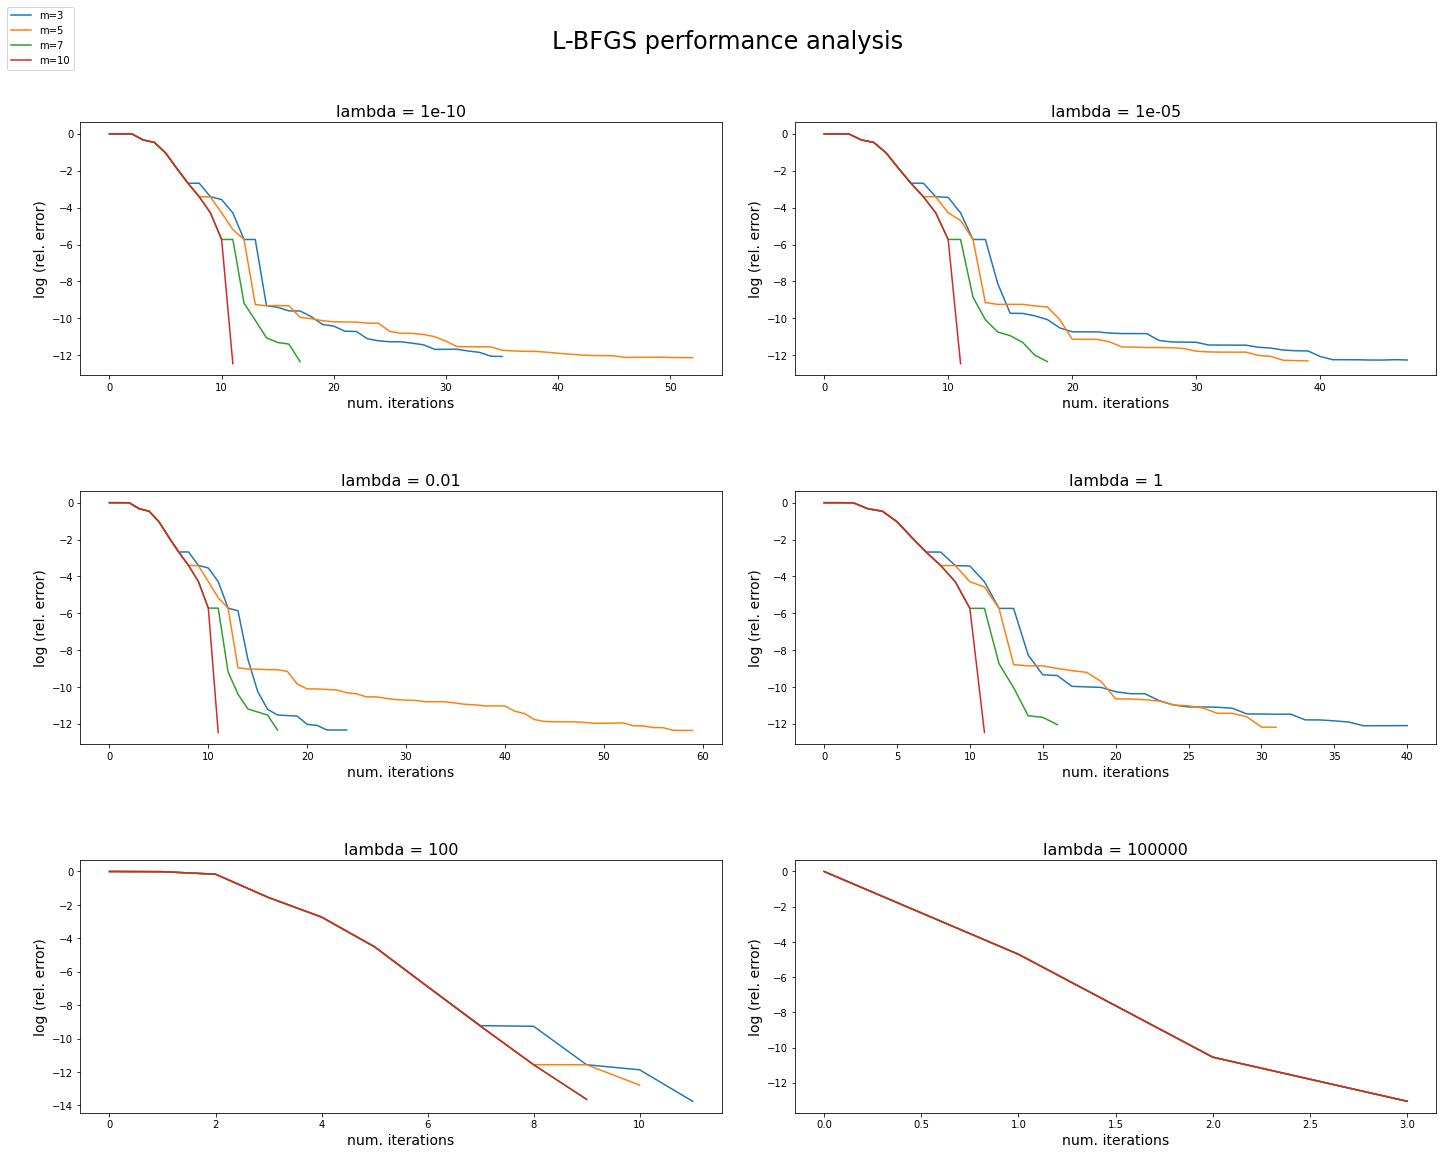

In [9]:
lambda_values = [1e-10, 1e-5, 0.01, 1, 100, 100000]
m_values = [3, 5, 7, 10]

fig, axs = plt.subplots(3,2, figsize = (20,16))

fig.suptitle('L-BFGS performance analysis', fontsize = 24)

for index, lambda_ in enumerate(lambda_values):
    for m in m_values:
        selected_vals = stats[(stats['m']== m) & (stats['lambda']==lambda_)]
        x = selected_vals['k'].to_numpy()
        y = np.log10(selected_vals['rel_error'].to_numpy())
        axs[int(index/2), index%2].plot(x, y)
        axs[int(index/2), index%2].set_title(('\n\n\nlambda = ' + str(lambda_)), fontsize= 16)
    axs[int(index/2), index%2].set_xlabel("num. iterations", fontsize= 14)
    axs[int(index/2), index%2].set_ylabel("\nlog (rel. error)", fontsize= 14)

fig.legend([('m='+str(m)) for m in m_values], loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0.)

plt.tight_layout()


In [10]:
df = overall_stats.sort_values(by='lambda')
df = df[['lambda', 'func_vals_bp', 'small_eig_bp', 'sol_norm_bp', 'bound_const_part']]
df = df.groupby('lambda').first().reset_index()
df

,lambda,func_vals_bp,small_eig_bp,sol_norm_bp,bound_const_part
0,1.000000e-10,3.701477,7.071068e+09,7.879183e+00,2.062250e+11
1,1.000000e-09,3.701477,7.071068e+08,7.879183e+00,2.062250e+10
2,1.000000e-08,3.701477,7.071069e+07,7.879183e+00,2.062250e+09
3,1.000000e-07,3.701477,7.071068e+06,7.879183e+00,2.062250e+08
4,1.000000e-06,3.701477,7.071068e+05,7.879183e+00,2.062250e+07
5,1.000000e-05,3.701477,7.071068e+04,7.879183e+00,2.062249e+06
6,1.000000e-04,3.701477,7.071068e+03,7.879183e+00,2.062249e+05
7,1.000000e-03,3.701477,7.071068e+02,7.879183e+00,2.062249e+04
8,1.000000e-02,3.701476,7.071068e+01,7.879185e+00,2.062250e+03
9,1.000000e-01,3.701433,7.071068e+00,7.879443e+00,2.062293e+02


In [11]:
df2 = overall_stats.sort_values(by='lambda')
df2 = df2[['lambda', 'r_esteem', 'cond_num_Xhat']]
df2 = df2.groupby('lambda').mean()
df2



,k,r_esteem,cond_num_Xhat
lambda,,,
1.000000e-10,30.000,5.100868e-02,1.137546e+13
1.000000e-09,30.000,5.602786e-02,1.137546e+12
1.000000e-08,30.000,6.161621e-02,1.137546e+11
1.000000e-07,30.000,6.787318e-02,1.137546e+10
1.000000e-06,31.875,8.592503e-02,1.137546e+09
1.000000e-05,28.250,7.159701e-02,1.137546e+08
1.000000e-04,30.000,9.112961e-02,1.137546e+07
1.000000e-03,29.750,9.653137e-02,1.137546e+06
1.000000e-02,27.750,1.003385e-01,1.137546e+05


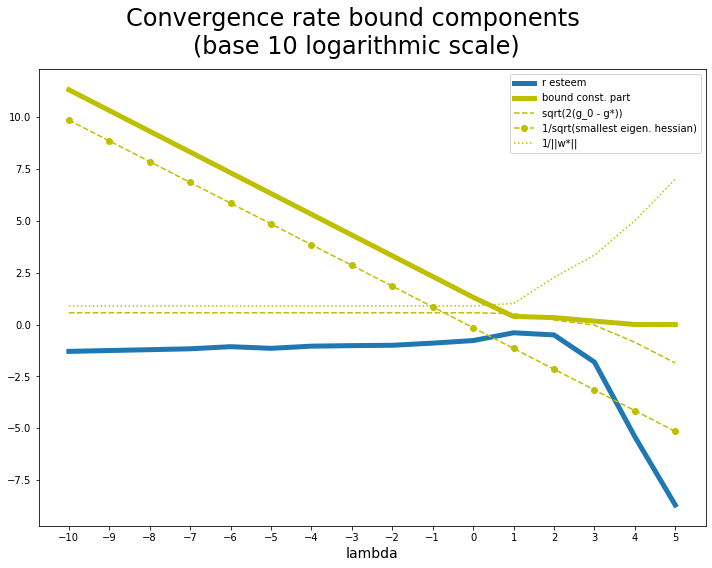

In [12]:
lambda_values = np.logspace(-10, 5, 16)

fig, ax = plt.subplots(1,1, figsize = (10,8))

fig.suptitle('Convergence rate bound components \n(base 10 logarithmic scale)', 
             fontsize = 24)

x = np.log10(np.array(lambda_values))
y = np.log10(df.bound_const_part.to_numpy())
exp = np.log10(df2.r_esteem.to_numpy())

y1 = np.log10(df.func_vals_bp.to_numpy())
y2 = np.log10(df.small_eig_bp.to_numpy())
y3 = np.log10(df.sol_norm_bp.to_numpy())


ax.plot(x, exp, linewidth=5, label = 'r esteem')
ax.plot(x, y, 'y' , linewidth=5, label='bound const. part')
ax.plot(x, y1, 'y' , linestyle='dashed', label='sqrt(2(g_0 - g*))')
ax.plot(x, y2, 'yo', linestyle='dashed', label='1/sqrt(smallest eigen. hessian)')
ax.plot(x, y3, 'y' , linestyle='dotted', label='1/||w*||')

ax.set_xticks(np.log10(lambda_values))
ax.set_xlabel("lambda", fontsize= 14)


plt.legend()
plt.tight_layout()